## South African Language Identification Hack 2022

### Name: Abdulrasheed Musa

### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
In this challenge, we will take a text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

## Table of Contents<a id="content"></a>


* [1. Problem Statement](#chapter1)
    
* [2. Import Relevant packages](#chapter2)

* [3. Loading Data](#chapter3)

* [4. Exploratory Data Analysis (EDA)](#chapter4)
      
* [5. Clean the Data](#chapter5)

* [6. Modeling and Evaluation](#chapter6)

* [7. Conclusion](#chapter7)
    


## 1.  Problem statement  <a class="anchor" id="chapter1"></a>

To develop a sophisticated machine learning model which can predict the South African language a text has been written in.

## 2. Importing relevant packages  <a class="anchor" id="chapter2"></a>

In [379]:
# Data loading and Text processing
import numpy as np
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler


## 3. Loading Data  <a class="anchor" id="chapter3"></a>

In [431]:
# read train dataset
train_set = pd.read_csv('https://raw.githubusercontent.com/Abdulr3/South-African-Language-Identification-Hack-2022/main/train_set.csv')

# read test dataset
test_set = pd.read_csv('https://raw.githubusercontent.com/Abdulr3/South-African-Language-Identification-Hack-2022/main/test_set.csv')

## 4.  Exploratory data analysis  <a class="anchor" id="chapter4"></a>

Exploratory data analsysis is the process of deriving insights from our dataset without making any assumptions. Here we will using both graphical and non-graphical exploratory data analysis

#### Overview of training set

In [432]:
#Training set
train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### Class distribution

In [433]:
#Counting the occurance of each language in the training set
Language_counts = train_set['lang_id'].value_counts()
print(Language_counts)

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64


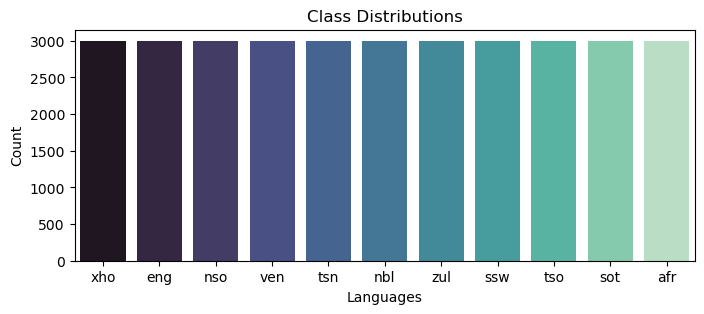

In [434]:
'''
    Calculating the class distribution for language id
'''

fig, ax = plt.subplots(figsize = (8,3))
target =train_set['lang_id'].value_counts()
sns.barplot(x=train_set['lang_id'].unique(), y=target, ax=ax, palette="mako")
plt.title('Class Distributions')
plt.ylabel("Count")
plt.xlabel("Languages")
plt.show()

We can see from the bar chart above, that each  language appears 3000 times. Therefore there is a balance in the class distribution and class inbalance is not a concern

In [435]:
#Viewing data type of each column
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


We can see that there are 33000 rows and no null values.

## 5. Cleaning data  <a class="anchor" id="chapter5"></a>

We will be performing minimal cleaning in our dataset, by converting the text to lower case and removing punctuations.

In [436]:
def clean_data(text):   
    
    # change the case of all the words in the text to lowercase 
    text = text.lower()
    
    # remove punctuation
    text = "".join([x for x in text if x not in string.punctuation])
    return text

In [437]:
#cleaning train dataset
train_set['text'] = train_set['text'].apply(clean_data)
#cleaning test dataset
test_set['text'] = test_set['text'].apply(clean_data)

#### Transforming Text into Numbers

Here, we will be  convert our unique languages into intergers since our models can only take in numerical data. This will be done  as follows {'xho':1, 'eng':2, 'nso':3, 'ven':4, 'tsn':5, 'nbl':6,'zul':7, 'ssw':8, 'tso':9, 'sot':10, 'afr':11}

In [438]:
lang_dict = {'xho':1, 'eng':2, 'nso':3, 'ven':4, 'tsn':5, 'nbl':6,'zul':7, 'ssw':8, 'tso':9, 'sot':10, 'afr':11}

train_set['lang_id'].replace(lang_dict, inplace=True)

In [439]:
train_set['lang_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 6. Modelling and Evaluation  <a class="anchor" id="chapter6"></a>

We will be building different types of classification models, and will be comparing their performances

In [440]:
# Split the dataset into train & validation (15%) for model training

# Seperate features and tagret variables
X = train_set['text']
y = train_set['lang_id']

# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Linear  Support vector model 

In the SVM algorithm, we plot each data item as a point in n-dimensional space  with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [441]:
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])


In [442]:
# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_test)

In [443]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_test, y_pred_lsvc))


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       456
           2       1.00      1.00      1.00       457
           3       1.00      1.00      1.00       474
           4       1.00      1.00      1.00       479
           5       1.00      1.00      1.00       443
           6       1.00      0.99      0.99       460
           7       0.99      0.99      0.99       435
           8       1.00      1.00      1.00       456
           9       1.00      1.00      1.00       412
          10       1.00      1.00      1.00       458
          11       1.00      1.00      1.00       420

    accuracy                           1.00      4950
   macro avg       1.00      1.00      1.00      4950
weighted avg       1.00      1.00      1.00      4950



In [444]:
lsvc.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(class_weight='balanced'))])

### Random Forest Classification


Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. 

In [445]:
# Define  Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

In [446]:
# Model Training and validation 

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [447]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.91      0.82      0.86       456
           2       0.98      1.00      0.99       457
           3       0.99      0.98      0.99       474
           4       1.00      1.00      1.00       479
           5       0.95      0.97      0.96       443
           6       0.63      0.85      0.72       460
           7       0.75      0.75      0.75       435
           8       0.97      0.70      0.81       456
           9       0.98      1.00      0.99       412
          10       0.98      0.96      0.97       458
          11       1.00      1.00      1.00       420

    accuracy                           0.91      4950
   macro avg       0.92      0.91      0.91      4950
weighted avg       0.92      0.91      0.91      4950



### K Nearest Neighbors classification

The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [448]:
# Define model
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

In [449]:
#Model training and validation
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [450]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       456
           2       0.98      1.00      0.99       457
           3       0.94      0.98      0.96       474
           4       1.00      1.00      1.00       479
           5       0.95      0.95      0.95       443
           6       0.90      0.96      0.93       460
           7       0.95      0.87      0.91       435
           8       0.98      0.96      0.97       456
           9       0.98      1.00      0.99       412
          10       0.99      0.96      0.97       458
          11       1.00      0.99      0.99       420

    accuracy                           0.96      4950
   macro avg       0.96      0.96      0.96      4950
weighted avg       0.96      0.96      0.96      4950



### Model Comparison

In [451]:
#Calculating f1 score for each model
f1_lsvc = f1_score(y_test, y_pred_lsvc, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf,average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

In [452]:
print(f1_lsvc)
print(f1_rf)
print(f1_knn)

0.9975755936666235
0.9133177299902903
0.9635248763539824


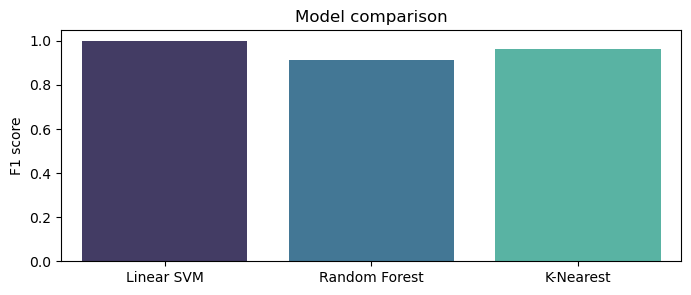

In [453]:
F1_scores={'Model':['Linear SVM','Random Forest','K-Nearest'],'F1_score':[f1_lsvc,f1_rf,f1_knn]}
F1= pd.DataFrame(F1_scores)
fig, ax = plt.subplots(figsize = (8,3))
target =F1['F1_score']
sns.barplot(x=F1['Model'].unique(), y=target, ax=ax, palette="mako")
plt.title('Model comparison')
plt.ylabel("F1 score")
plt.show()

We can see from the above plot, that the linear support vector machine model has the highest F1-score of 0.998. The F1-score is an error metric which measures model performance by calculating the harmonic mean of precision and recall for the minority positive class. It is a popular metric to use for classification models as it provides accurate results for both balanced and imbalanced datasets , and takes into account both the precision and recall ability of the model. Therefore our best model is the one trained using Linear support vector.

## 7. Conclusion  <a class="anchor" id="chapter7"></a>

We able to train and produce a powerful model, which would, with a high level of accuracy, determine in which language a text has been written. This was achieved by using best practices to prepare datasets, using a number of modelling techniques to train and finally select the best model based on performance.

### Submitting  to kaggle

In [454]:
knn.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])

In [ ]:
Prediction_lsvc =lsvc.predict(test_set['text'])
Prediction_rf = rf.predict(test_set['text'])
Prediction_knn = knn.predict(test_set['text'])
A = Prediction_knn

In [ ]:
lang_dict = {'xho':1, 'eng':2, 'nso':3, 'ven':4, 'tsn':5, 'nbl':6,'zul':7, 'ssw':8, 'tso':9, 'sot':10, 'afr':11}

In [ ]:
A=np.array(A,dtype='object')

In [ ]:
A[A == 1] = 'xho'
A[A == 2] = 'eng'
A[A == 3] = 'nso'
A[A == 4] = 'ven'
A[A == 5] = 'tsn'
A[A == 6] = 'nbl'
A[A == 7] = 'zul'
A[A == 8] = 'ssw'
A[A == 9] = 'tso'
A[A == 10] = 'sot'
A[A == 11] = 'afr'

In [ ]:
output = pd.DataFrame({'index':test_set['index'], 'lang_id':A})
output.to_csv('submission_knn.csv', index=False)